In [181]:
import pandas as pd
from Sector_Exposure import Rate_Exposures
import fredapi as fa
from datetime import date
import Useful_Functions as u
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

# 2006
# sectors_and_rates
sectors_df = pd.read_csv("2006.csv", index_col = "Date")

sectors_df['inflation'] = fred.get_series('T10YIE', observation_start = '2006-01-04', end = date.today())
sectors_df['oil'] = fred.get_series('DCOILBRENTEU', observation_start = '2006-01-04', end = date.today())
#sectors_df['gas'] = fred.get_series('GASDESW', observation_start = '2006-01-04', end = date.today())
#sectors_df['gas'] = sectors_df['gas'].ffill()
#sectors_df = sectors_df.dropna()
#sectors_df[int(len(sectors_df)*.7):]

sc = StandardScaler()


In [173]:

sectors_df.corr()


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,SP-500,Real Yield,Yield Curve,inflation,oil,gas
Materials,1.000000,0.978456,0.958960,0.928981,0.951382,0.818657,0.943748,0.901197,0.931341,0.922740,-0.066433,0.937277,0.893654,0.976589,-0.633763,-0.414585,0.199579,-0.124045,0.128845
Industrials,0.978456,1.000000,0.974094,0.961669,0.977568,0.831034,0.935584,0.871577,0.962259,0.941216,-0.125632,0.919060,0.956398,0.985588,-0.613155,-0.499919,0.080808,-0.248747,0.011618
Consumer Discretionary,0.958960,0.974094,1.000000,0.959244,0.985845,0.771990,0.979516,0.871078,0.943290,0.907324,-0.274601,0.960985,0.921475,0.993352,-0.676723,-0.452094,0.021265,-0.285688,-0.026767
Consumer Staples,0.928981,0.961669,0.959244,1.000000,0.981430,0.691213,0.903847,0.812435,0.948579,0.908238,-0.141937,0.867325,0.938966,0.954129,-0.723693,-0.428930,-0.064880,-0.301409,-0.023286
Health Care,0.951382,0.977568,0.985845,0.981430,1.000000,0.762108,0.951112,0.839436,0.958477,0.915043,-0.222212,0.924506,0.944303,0.985231,-0.658160,-0.471998,-0.038695,-0.329932,-0.047243
Financials,0.818657,0.831034,0.771990,0.691213,0.762108,1.000000,0.767146,0.821306,0.815755,0.871829,-0.130397,0.789759,0.744657,0.821578,-0.194668,-0.729075,0.281510,-0.261689,-0.051425
Information Technology,0.943748,0.935584,0.979516,0.903847,0.951112,0.767146,1.000000,0.870700,0.911758,0.864165,-0.342591,0.993659,0.861002,0.979413,-0.645519,-0.418007,0.066774,-0.233785,0.022358
Telecommunication Services,0.901197,0.871577,0.871078,0.812435,0.839436,0.821306,0.870700,1.000000,0.843563,0.894824,-0.109652,0.878898,0.718944,0.890712,-0.595197,-0.445015,0.245063,-0.132626,0.070474
Utilities,0.931341,0.962259,0.943290,0.948579,0.958477,0.815755,0.911758,0.843563,1.000000,0.946965,-0.186871,0.886571,0.939747,0.958774,-0.595848,-0.602559,-0.008689,-0.306709,-0.023672
Real Estate,0.922740,0.941216,0.907324,0.908238,0.915043,0.871829,0.864165,0.894824,0.946965,1.000000,-0.067722,0.848819,0.872598,0.930099,-0.574299,-0.631989,0.154939,-0.226763,0.043529


<AxesSubplot:xlabel='Date'>

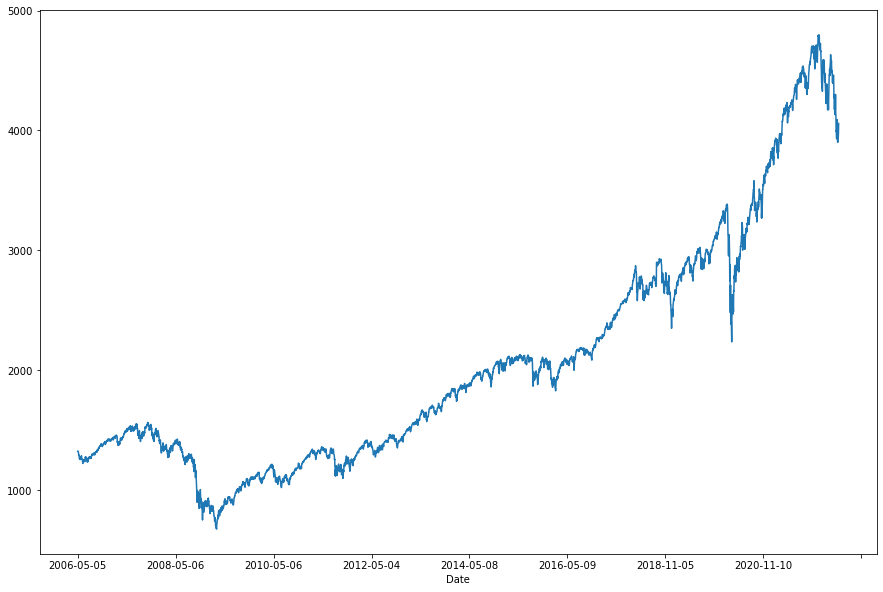

In [182]:

#sp_500 = pd.Series(sc.fit_transform(np.array(sectors_df['SP-500']).reshape(-1,1)).ravel(), index = sectors_df['SP-500'].index)

#sectors_df['SP-500'].pct_change().plot(figsize = (15,10))

# [-1000:]
sectors_df['SP-500'].plot(figsize = (15,10))



In [183]:

# (sectors_df.index >= "2017-01-04") & 
normal = sectors_df.loc[ (sectors_df.index < "2007-11-04")]
crash_of_08 = sectors_df.loc[(sectors_df.index >= "2007-11-04") & (sectors_df.index < "2013-01-04")]
normal2 = sectors_df.loc[(sectors_df.index >= "2013-01-04") & (sectors_df.index < "2018-01-04")]
crash_of_19 = sectors_df.loc[(sectors_df.index >= "2018-01-04") & (sectors_df.index < "2019-08-04")]
normal3 = sectors_df.loc[(sectors_df.index >= "2019-08-04") & (sectors_df.index < "2020-01-04")]
covid = sectors_df.loc[(sectors_df.index >= "2020-01-04") & (sectors_df.index < "2021-08-04")]
normal4 = sectors_df.loc[(sectors_df.index >= "2020-10-04") & (sectors_df.index < "2021-09-04")]
crash_of_22 = sectors_df.loc[(sectors_df.index >= "2021-11-04")]



In [184]:


def corr_diffs(rate, sec):

    crashes = {'08' : crash_of_08, '19' : crash_of_19, 'covid' : covid, '22' : crash_of_22}
    # [:-4]
    mean_corr_per_crash = [np.mean(crashes[c].corr()[rate][sec]) for c in crashes]
    crash_means = np.mean(mean_corr_per_crash)

    normal_periods = {'1' : normal, '2' : normal2, '3' : normal3, '4' : normal4}
    # [:-4]
    mean_corr_per_normal = [np.mean(normal_periods[n].corr()[rate][sec]) for n in normal_periods]
    normal_means = np.mean(mean_corr_per_normal)

    return {"distressed" : mean_corr_per_crash, "normal" : mean_corr_per_normal}, (crash_means, normal_means)


''' Divergent Ones '''
#corr_diffs(u.ry, u.cd)
#corr_diffs(u.ry, u.ind)
#corr_diffs(u.ry, u.fin)


corr_diffs("oil", u.en)


({'distressed': [0.8953579598810449,
   0.7729199634644753,
   0.8356172811839659,
   0.9204770966391205],
  'normal': [0.66052381390466,
   0.8263533613476112,
   0.7520097900852677,
   0.95066507365406]},
 (0.8560930752921516, 0.7973880097478997))

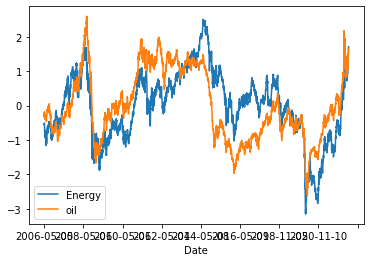

In [185]:

scaled_sectors_df = pd.DataFrame(sc.fit_transform(sectors_df), columns=sectors_df.columns, index = sectors_df.index)
plt.figure()
scaled_sectors_df["Energy"].plot()
scaled_sectors_df['oil'].plot()
plt.legend()

In [291]:

sectors_df = sectors_df.loc[ sectors_df.index >= "2010-01-04"]

ok = Rate_Exposures(sectors_df, 252, 30, ['Real Yield', 'Yield Curve', "inflation", "oil"], "SP-500")

rets = ok.forward_returns_daily.dropna()

rets = rets.drop(columns = ['inflation_scores', "Real Yield_scores", "Yield Curve_scores"])

In [292]:

mean_rets = {}

for inf in range(-5,6):
    
    # ['Real Yield_scores']
    # inflation_scores
    mean_rets[inf] = rets.iloc[:,:-1].loc[ rets.oil_scores == inf ].mean()
    
    #mean_rets = mean_rets.append(rets.iloc[:,:-3].loc[ rets.inflation_scores == inf ].mean())
    
mean_rets = pd.DataFrame(mean_rets).T
mean_rets

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,-0.006067,-0.002099,0.013731,0.010080,0.017387,-0.012656,0.007854,-0.011688,0.004619,0.013736,-0.055915,0.013819,0.007301
-4,-0.008723,-0.013672,0.017699,0.009026,0.024468,-0.009886,0.012205,-0.007213,-0.012407,0.000211,-0.074647,0.013050,-0.013610
-3,-0.014287,-0.021495,0.010582,0.020932,0.032821,-0.014582,0.015406,-0.009869,0.005600,-0.004080,-0.094581,0.007203,-0.031335
-2,-0.006584,-0.003931,0.009875,0.004586,-0.003306,-0.013297,0.013353,-0.002220,-0.010631,-0.023664,-0.013178,0.008041,-0.009739
-1,-0.011856,0.000018,0.002768,0.003647,0.003649,-0.000431,0.000789,-0.002107,0.009847,0.000827,-0.013679,-0.009282,0.004284
0,-0.005937,-0.003307,0.002362,-0.008190,0.009275,0.004742,0.004030,-0.016745,-0.008438,-0.016318,-0.009648,0.005372,0.003441
1,0.003005,0.001965,0.002138,-0.013380,0.003889,0.012377,0.003332,-0.017246,-0.019225,-0.016903,-0.007306,0.022216,0.008771
2,0.008869,0.012523,0.005656,-0.014349,0.003580,0.016809,-0.001194,-0.016887,-0.019262,-0.013780,-0.008870,0.007545,0.023527
3,-0.000230,-0.003453,0.007914,0.006230,0.022628,-0.014198,0.002157,0.004483,0.001261,0.010511,-0.015997,0.002448,-0.002804
4,-0.001729,-0.006600,0.004471,0.021166,0.030448,-0.032233,-0.001275,0.019030,0.012592,0.015431,-0.011495,-0.005725,-0.011013


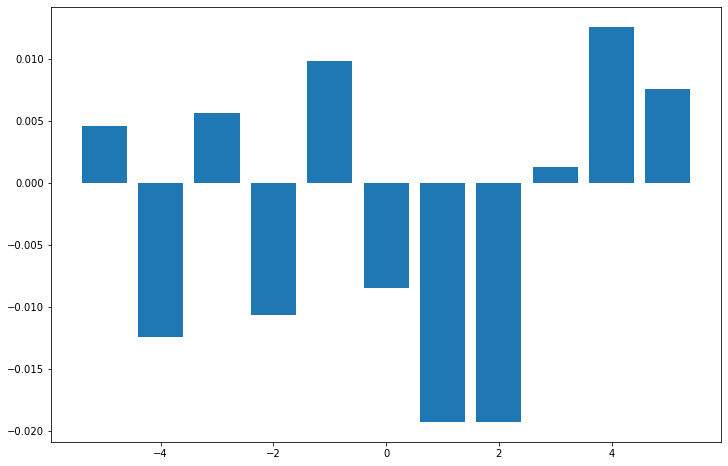

In [293]:


u.barplot_1d(mean_rets[u.ut])



In [252]:

mean_rets['scores'] = mean_rets.index
mean_rets.corr()

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,scores
Materials,1.000000,0.413392,-0.318100,-0.799555,-0.761519,0.599646,0.539147,-0.849682,-0.705121,-0.383928,0.327312,0.749830,0.316091,-0.085128
Industrials,0.413392,1.000000,-0.265292,-0.487875,-0.599577,0.737816,-0.295596,-0.523348,-0.090775,-0.107151,0.441975,0.121556,0.875928,0.001250
Consumer Discretionary,-0.318100,-0.265292,1.000000,0.206790,0.548143,-0.404562,-0.207896,0.266619,0.408435,0.029213,-0.445155,-0.329328,0.078499,-0.260368
Consumer Staples,-0.799555,-0.487875,0.206790,1.000000,0.846295,-0.837619,-0.406615,0.813995,0.637031,0.291835,-0.505112,-0.786146,-0.506776,0.210304
Health Care,-0.761519,-0.599577,0.548143,0.846295,1.000000,-0.855846,-0.368920,0.698055,0.535589,0.119935,-0.598681,-0.687454,-0.532043,0.197150
Financials,0.599646,0.737816,-0.404562,-0.837619,-0.855846,1.000000,0.068035,-0.751332,-0.374815,-0.021460,0.569280,0.477211,0.723123,-0.215092
Information Technology,0.539147,-0.295596,-0.207896,-0.406615,-0.368920,0.068035,1.000000,-0.455551,-0.508581,-0.191515,-0.272809,0.714124,-0.290854,-0.476215
Telecommunication Services,-0.849682,-0.523348,0.266619,0.813995,0.698055,-0.751332,-0.455551,1.000000,0.492481,0.154918,-0.221754,-0.702423,-0.494980,0.306073
Utilities,-0.705121,-0.090775,0.408435,0.637031,0.535589,-0.374815,-0.508581,0.492481,1.000000,0.774267,-0.398523,-0.619172,0.127024,-0.245640
Real Estate,-0.383928,-0.107151,0.029213,0.291835,0.119935,-0.021460,-0.191515,0.154918,0.774267,1.000000,-0.143436,-0.170283,0.088231,-0.361184


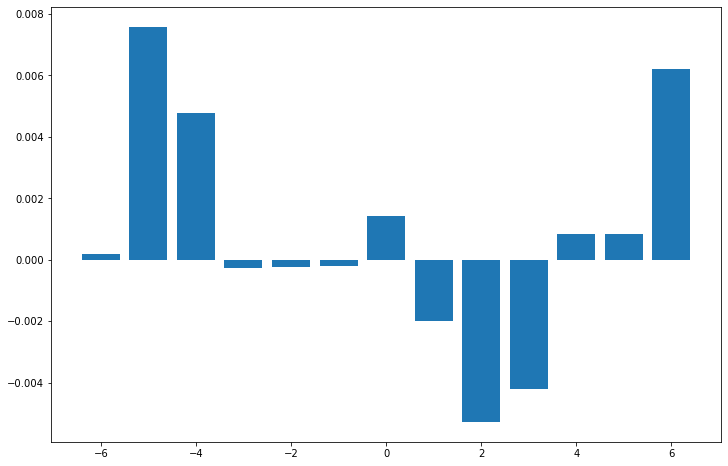

In [253]:


bruh = ok.yc_mean_returns.drop(columns = ['inflation_scores']).copy()

bruh['scores'] = bruh.index

#bruh.corr()['scores']

u.barplot_1d(bruh[u.ut])

<AxesSubplot:>

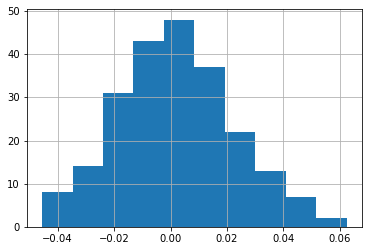

In [269]:


cool = ok.ry_mean_returns.copy()

cool['scores'] = cool.index

#cool.corr()['scores'].plot()
#bruh.corr()['scores'].plot()
#mean_rets.corr()['scores'].plot()

#mos_def = pd.DataFrame([cool.corr()['scores'], bruh.corr()['scores'], mean_rets.corr()['scores']]).drop(columns = ['inflation_scores', 'scores']).T
#mos_def.columns = ["ry", "yc", "inflation"]
#mos_def.corr()


#u.barplot_1d(cool[u.ut])
ok.ry_total_returns[2][u.ut].hist()




<AxesSubplot:>

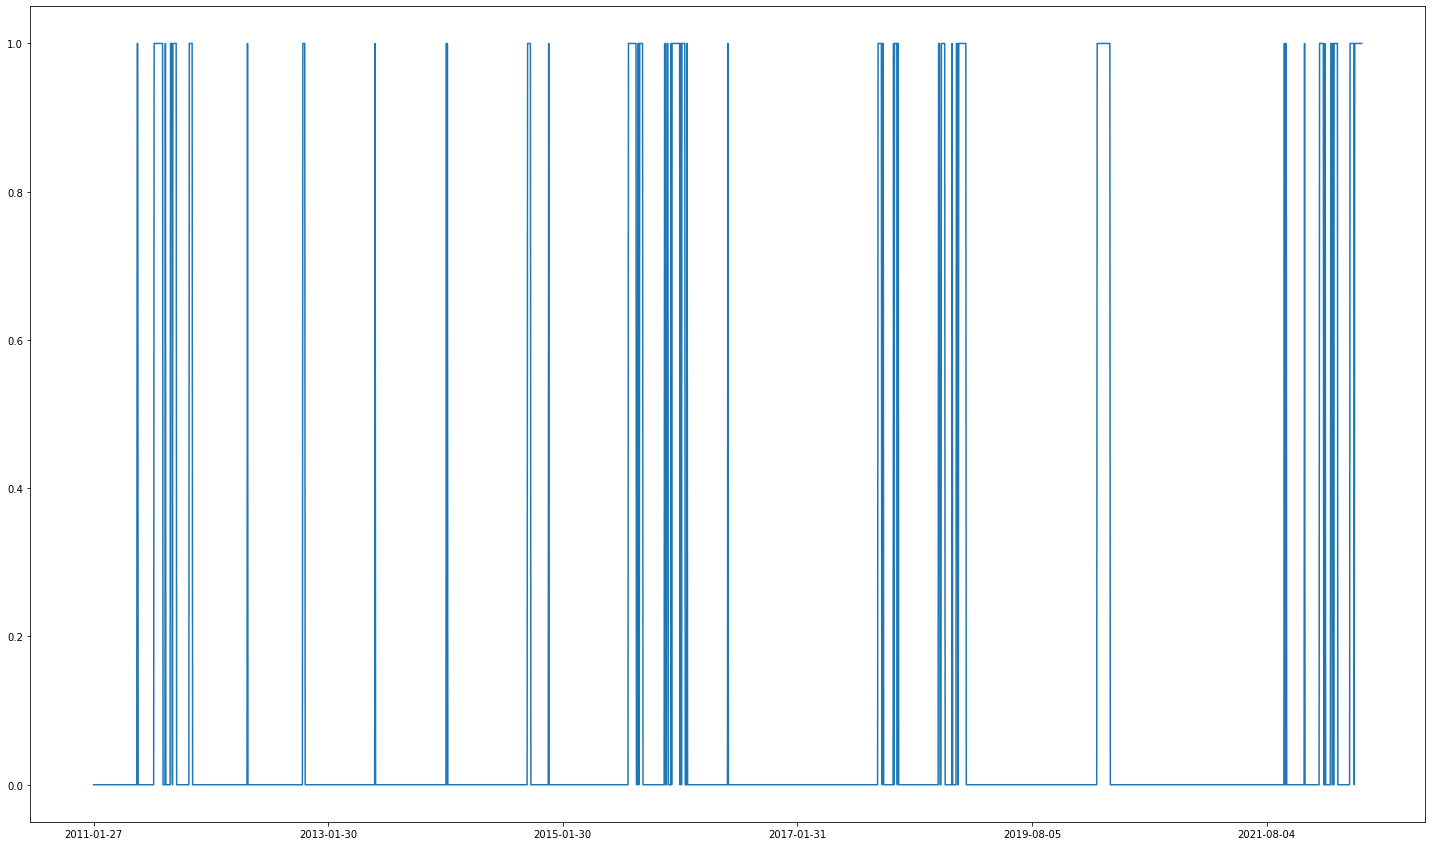

In [334]:



sp_scores = ok.get_scores(252, 'SP-500')


sp_distressed = (sp_scores <= -2).astype(int)

consider_sp500 = rets.drop(columns = ['oil_scores'])
consider_sp500['sp_scores'] = sp_scores
consider_sp500['sp_distressed'] = sp_distressed


sp_distressed.plot(figsize=(25,15))


In [331]:

mark_distressed_periods = []

for num, s in enumerate(sp_distressed):
    
    if s and not sp_distressed[num-1]:
        i = 1
        while num+i < len(sp_distressed) and sp_distressed[num+i]:
            
            i += 1
        
        mark_distressed_periods.append(i)
        
    else:
        mark_distressed_periods.append(0)


In [333]:

mark_distressed_periods = pd.Series(mark_distressed_periods, index = sp_scores.index)

#for num, s in enumerate(mark_distressed_periods):
    
    #if s > 5:
        #print('ok')


mark_distressed_periods.iloc[np.where(mark_distressed_periods > 5)[0]].index



Index(['2011-08-04', '2015-08-21', '2016-01-07', '2016-02-05', '2018-12-17',
       '2020-03-05', '2022-01-20', '2022-05-05', '2022-05-18'],
      dtype='object')

In [300]:

mean_rets_sp = {}

for inf in range(-10,6):
    mean_rets_sp[inf] = consider_sp500.iloc[:,:-2].loc[ consider_sp500.sp_scores == inf ].mean()

mean_rets = pd.DataFrame(mean_rets).T
mean_rets


,-5,-4,-3,-2,-1,0,1,2,3,4,5
Materials,-0.006067,-0.008723,-0.014287,-0.006584,-0.011856,-0.005937,0.003005,0.008869,-0.000230,-0.001729,0.012873
Industrials,-0.002099,-0.013672,-0.021495,-0.003931,0.000018,-0.003307,0.001965,0.012523,-0.003453,-0.006600,0.008011
Consumer Discretionary,0.013731,0.017699,0.010582,0.009875,0.002768,0.002362,0.002138,0.005656,0.007914,0.004471,0.005913
Consumer Staples,0.010080,0.009026,0.020932,0.004586,0.003647,-0.008190,-0.013380,-0.014349,0.006230,0.021166,0.033449
Health Care,0.017387,0.024468,0.032821,-0.003306,0.003649,0.009275,0.003889,0.003580,0.022628,0.030448,0.035735
Financials,-0.012656,-0.009886,-0.014582,-0.013297,-0.000431,0.004742,0.012377,0.016809,-0.014198,-0.032233,-0.029665
Information Technology,0.007854,0.012205,0.015406,0.013353,0.000789,0.004030,0.003332,-0.001194,0.002157,-0.001275,-0.023998
Telecommunication Services,-0.011688,-0.007213,-0.009869,-0.002220,-0.002107,-0.016745,-0.017246,-0.016887,0.004483,0.019030,0.042355
Utilities,0.004619,-0.012407,0.005600,-0.010631,0.009847,-0.008438,-0.019225,-0.019262,0.001261,0.012592,0.007561
Real Estate,0.013736,0.000211,-0.004080,-0.023664,0.000827,-0.016318,-0.016903,-0.013780,0.010511,0.015431,0.005598
